# 763. Partition Labels
A string S of lowercase letters is given. We want to partition this string into as many parts as possible so that each letter appears in at most one part, and return a list of integers representing the size of these parts.

Example 1:
Input: S = "ababcbacadefegdehijhklij"
Output: [9,7,8]
Explanation:
The partition is "ababcbaca", "defegde", "hijhklij".
This is a partition so that each letter appears in at most one part.
A partition like "ababcbacadefegde", "hijhklij" is incorrect, because it splits S into less parts.
Note:

S will have length in range [1, 500].
S will consist of lowercase letters ('a' to 'z') only.

In [ ]:
def partitionLabels(self, S):
    sizes = []
    while S:
        split = 1
        while set(S[:split]) & set(S[split:]):
            split += 1
        sizes.append(split)
        S = S[split:]
    return sizes
        

## Approach 1: Greedy 
Intuition

Let's try to repeatedly choose the smallest left-justified partition. Consider the first label, say it's 'a'. The first partition must include it, and also the last occurrence of 'a'. However, between those two occurrences of 'a', there could be other labels that make the minimum size of this partition bigger. For example, in "abccaddbeffe", the minimum first partition is "abccaddb". This gives us the idea for the algorithm: For each letter encountered, process the last occurrence of that letter, extending the current partition [anchor, j] appropriately.

Algorithm

We need an array last[char] -> index of S where char occurs last. Then, let anchor and j be the start and end of the current partition. If we are at a label that occurs last at some index after j, we'll extend the partition j = last[c]. If we are at the end of the partition (i == j) then we'll append a partition size to our answer, and set the start of our new partition to i+1.

Figure out the rightmost index first and use it to denote the start of the next section.

Reset the left pointer at the start of each new section.

Store the difference of right and left pointers + 1 as in the result for each section.

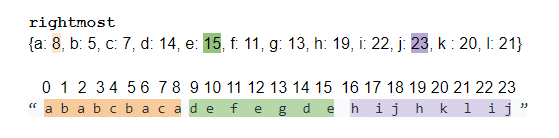

In [2]:
def partitionLabels(S):
    sizes = []
    # record the last index of each char
    last = {char:i for i,char in enumerate(S)}
    
    # record the current sub string [left:right]
    l = r = 0
    for i in range(len(S)):
        r = max(r,last[S[i]])
        if i == r:
            sizes.append(r-l+1)
            l = r+1
    return sizes

partitionLabels("ababcbacadefegdehijhklij")

[9, 7, 8]